In [1]:
import pandas as pd
import numpy as np
import itertools
import math
import time
import statsmodels.api as sm
from pandas import Series, DataFrame
from sklearn import linear_model,metrics
from tqdm import tnrange, tqdm_notebook

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
df=pd.read_csv(r"C:\Users\ankit\Downloads\video_games_sales.csv")
print(df.head())


                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [3]:
df.shape

(16719, 16)

In [4]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:xlabel='Year_of_Release', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='NA_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='EU_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='JP_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='Other_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='Global_Sales', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='Critic_Score', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='Critic_Count', ylabel='Year_of_Release'>,
        <AxesSubplot:xlabel='User_Count', ylabel='Year_of_Release'>],
       [<AxesSubplot:xlabel='Year_of_Release', ylabel='NA_Sales'>,
        <AxesSubplot:xlabel='NA_Sales', ylabel='NA_Sales'>,
        <AxesSubplot:xlabel='EU_Sales', ylabel='NA_Sales'>,
        <AxesSubplot:xlabel='JP_Sales', ylabel='NA_Sales'>,
        <AxesSubplot:xlabel='Other_Sales', ylabel='NA_Sales'>,
        <AxesSubplot:xlabel='Global_Sales', ylabel='NA_Sales'>

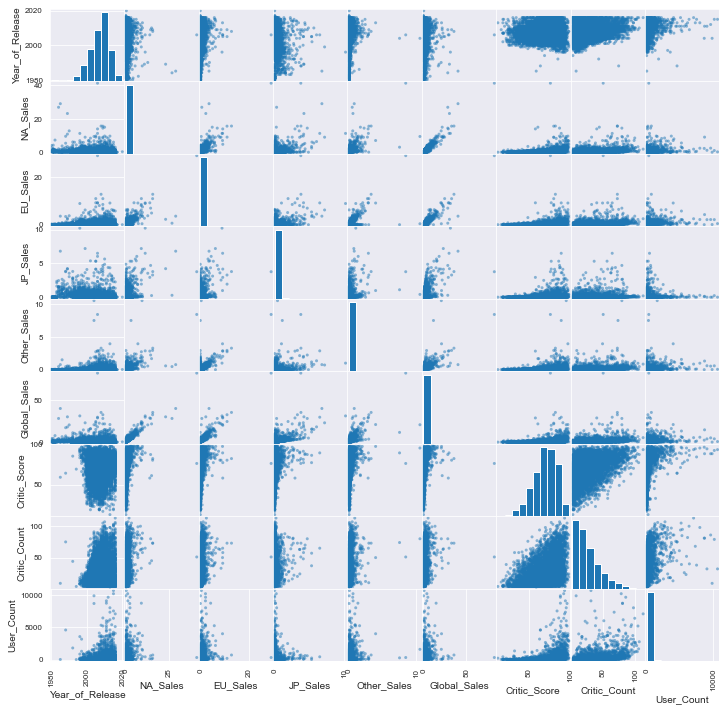

In [5]:
pd.plotting.scatter_matrix(df, figsize=(12,12))

In [6]:
print(df.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [7]:
df1=df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.36,28.96,3.77,8.45,82.53
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16714,0.00,0.00,0.01,0.00,0.01
16715,0.00,0.01,0.00,0.00,0.01
16716,0.00,0.00,0.01,0.00,0.01
16717,0.01,0.00,0.00,0.00,0.01


In [8]:
df1=df1.dropna()

                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.092562  0.003842 -0.168386     0.037700   
NA_Sales               -0.092562  1.000000  0.765336  0.449598     0.638654   
EU_Sales                0.003842  0.765336  1.000000  0.435068     0.722796   
JP_Sales               -0.168386  0.449598  0.435068  1.000000     0.291096   
Other_Sales             0.037700  0.638654  0.722796  0.291096     1.000000   
Global_Sales           -0.076433  0.941010  0.901239  0.612300     0.749242   
Critic_Score            0.011411  0.240755  0.220752  0.152593     0.198554   
Critic_Count            0.223407  0.295413  0.277533  0.180219     0.251639   
User_Count              0.175339  0.246429  0.283360  0.075638     0.238982   

                 Global_Sales  Critic_Score  Critic_Count  User_Count  
Year_of_Release     -0.076433      0.011411      0.223407    0.175339  
NA_Sales             0.941010      0.240755      0.295413    0.24

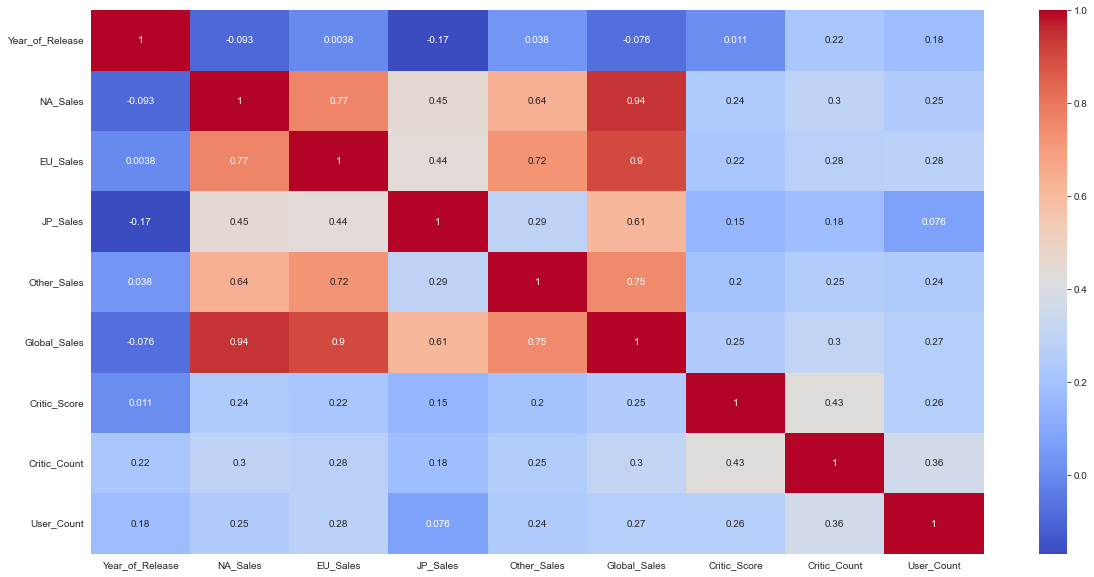

In [9]:
print(df.corr())
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True, cmap="coolwarm")
plt.show()

In [10]:
# Linear Regression

In [11]:
# prepare the data by storing the features we need to train this model in the x variable 
#and storing the target column in the y variable

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [13]:
# going to attempt to carry out linear regression with 0 predictors
x = np.zeros([16719,1])
y = df1.iloc[:, 4].values
# train test split and split the dataframe
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)
# reshape the data into long 2D arrays with 1 column and as many rows as necessary
#xtrain = xtrain.reshape(-1, 1)
#xtest = xtest.reshape(-1, 1)
#ytrain = ytrain.reshape(-1, 1)
#ytest = ytest.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(xtrain, ytrain)
                
ypred = lin_reg.predict(xtest)


print('intercept = ',lin_reg.intercept_)
print('coefficients = ',lin_reg.coef_)
print("r2 = ",r2_score(ytest, ypred))
print('Performance on test data(same as r2) ',lin_reg.score(xtest,ytest))
print('mae = ',mean_absolute_error(ytest,ypred))
mse = mean_squared_error(ytest,ypred)
rmse = math.sqrt(mse)
rss = mean_squared_error(ytest,ypred)*len(ytest)
print('mse = ',mse)
print('rmse = ',rmse)
print('rss = ',rss)


intercept =  0.5289795553968395
coefficients =  [0.]
r2 =  -6.316872995393297e-05
Performance on test data(same as r2)  -6.316872995393297e-05
mae =  0.5914748563425979
mse =  3.026261028482128
rmse =  1.7396151955194368
rss =  16698.90835516438


In [14]:
Xtrain = sm.add_constant(xtrain)
model = sm.OLS(ytrain, Xtrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 11 Feb 2022   Prob (F-statistic):                nan
Time:                        23:54:51   Log-Likelihood:                -20010.
No. Observations:               11201   AIC:                         4.002e+04
Df Residuals:                   11200   BIC:                         4.003e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5290      0.014     38.765      0.0

C:\anaconda3\envs\Data Science\lib\site-packages\statsmodels\regression\linear_model.py:1917: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [15]:
# going to attempt to carry out linear regression and predict the global sales of games
# based off of the sales in North America
x = df1.iloc[:, 1].values
y = df1.iloc[:, 4].values
# train test split and split the dataframe
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
# reshape the data into long 2D arrays with 1 column and as many rows as necessary
xtrain = xtrain.reshape(-1, 1)
xtest = xtest.reshape(-1, 1)
ytrain = ytrain.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)


lin_reg = LinearRegression()
lin_reg.fit(xtrain, ytrain)

LinearRegression()

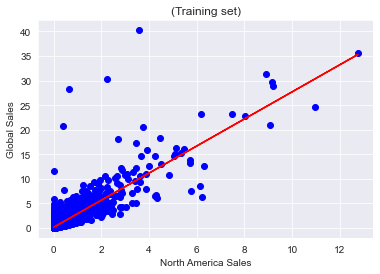

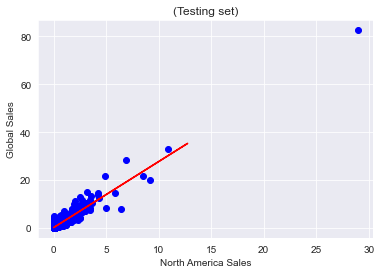

intercept =  [0.13558062]
coefficients =  [[2.75628759]]
r2 =  0.9122410476361932
Performance on test data(same as r2)  0.9122410476361932
mae =  0.23833325853770335
mse =  0.27787095342730367
rmse =  0.5271346634658962
rss =  1393.8007023913551


In [16]:
def plot_regression(classifier):

    plt.scatter(xtrain, ytrain,color='blue')
    plt.plot(xtrain, classifier.predict(xtrain), color='red')
    plt.title('(Training set)')
    plt.xlabel('North America Sales')
    plt.ylabel('Global Sales')
    plt.show()

    plt.scatter(xtest, ytest,color='blue')
    plt.plot(xtrain, classifier.predict(xtrain), color='red')
    plt.title('(Testing set)')
    plt.xlabel('North America Sales')
    plt.ylabel('Global Sales')
    plt.show()
    
plot_regression(lin_reg)
ypred = lin_reg.predict(xtest)
print('intercept = ',lin_reg.intercept_)
print('coefficients = ',lin_reg.coef_)
print("r2 = ",r2_score(ytest, ypred))
print('Performance on test data(same as r2) ',lin_reg.score(xtest,ytest))
print('mae = ',mean_absolute_error(ytest,ypred))
mse = mean_squared_error(ytest,ypred)
rmse = math.sqrt(mse)
print('mse = ',mse)
print('rmse = ',rmse)
rss = mean_squared_error(ytest,ypred)*len(ytest)
print('rss = ',rss)

In [17]:
Xtrain = sm.add_constant(xtrain)
model = sm.OLS(ytrain, Xtrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                 3.445e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:52   Log-Likelihood:                -12821.
No. Observations:               11703   AIC:                         2.565e+04
Df Residuals:                   11701   BIC:                         2.566e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1356      0.007     19.327      0.0

In [18]:
# Multiple Regression

In [19]:
# Using 2 predictors

In [20]:
x = df1[["NA_Sales", "EU_Sales"]].values
y = df1["Global_Sales"].values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.5, random_state=8)
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
print('intercept = ', model.intercept_)
print('coefficients = ', model.coef_)
print('r2 = ',r2_score(ytest,predictions))
print('mae = ',mean_absolute_error(ytest,predictions))
mse = mean_squared_error(ytest,predictions)
rmse = math.sqrt(mse)
print('mse = ',mse)
print('rmse = ',rmse)
rss = mse*len(ytest)
print('rss = ',rss)

intercept =  0.017677014780652867
coefficients =  [1.16350508 1.44954647]
r2 =  0.9669093887345301
mae =  0.11896611438897403
mse =  0.09214129415614845
rmse =  0.30354784492094233
rss =  770.3012191454011


In [21]:
Xtrain = sm.add_constant(xtrain)
model = sm.OLS(ytrain, Xtrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 9.524e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:52   Log-Likelihood:                -1525.8
No. Observations:                8359   AIC:                             3058.
Df Residuals:                    8356   BIC:                             3079.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0177      0.003      5.222      0.0

In [22]:
# Using 3 predictors

In [23]:
x = df1[["NA_Sales", "EU_Sales","JP_Sales"]].values
y = df1["Global_Sales"].values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=8)
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
print('intercept = ', model.intercept_)
print('coefficients = ', model.coef_)
print('r2 = ',r2_score(ytest,predictions))
print('mae = ',mean_absolute_error(ytest,predictions))
mse = mean_squared_error(ytest,predictions)
rmse = math.sqrt(mse)
print('mse = ',mse)
print('rmse = ',rmse)
rss = mse*len(ytest)
print('rss = ',rss)

intercept =  0.007091308583964784
coefficients =  [1.02830299 1.24056284 0.96731887]
r2 =  0.9760968673964905
mae =  0.02601145405055945
mse =  0.03722976010479385
rmse =  0.19295014927383147
rss =  124.49631779043062


In [24]:
Xtrain = sm.add_constant(xtrain)
model = sm.OLS(ytrain, Xtrain)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.071e+06
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:52   Log-Likelihood:                 11305.
No. Observations:               13375   AIC:                        -2.260e+04
Df Residuals:                   13371   BIC:                        -2.257e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.001      7.484      0.0

In [25]:
# Polynomial Regression

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


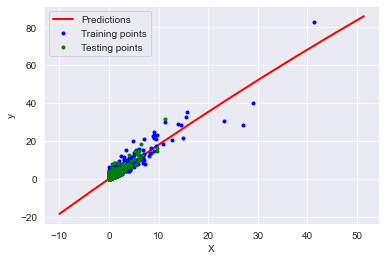

Intercept: 0.055
R2 score : 0.860
MSE: 0.246
RMSE: 0.496
MAE: 0.440
RSS: 823.462


In [26]:
# NA Sales degree 2
x = df1[['NA_Sales']]
y = df1['Global_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

x_max = np.max(x) + 10
x_min = np.min(x) - 10
#calculating line values of x and y
X_new = np.linspace(x_min, x_max,10)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


print("Intercept: %0.3f" % lr.intercept_)
print("R2 score : %.3f" % r2_score(y_test, lr.predict(poly.fit_transform(x_test))))
print("MSE: %.3f" % mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test)))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, lr.predict(poly.fit_transform(x_test)))))
rss = (mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))*len(y_test)
print("RSS: %0.3f" % rss)


In [27]:
xtrain_sm = sm.add_constant(x_train_trans)
lr = sm.OLS(y_train,xtrain_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                 5.441e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:52   Log-Likelihood:                -10457.
No. Observations:               13375   AIC:                         2.092e+04
Df Residuals:                   13372   BIC:                         2.094e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0546      0.005     10.931      0.000       0.045       0.064
x1             1.8246      0.008    216.433      0.000       1.808       1.841
x2            -0.0030      0.000     -8.080      0.000      -0.004      -0.002
==============================================================================
Omnibus:                     8769.501   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29672204.894
Skew:                           1.474   Prob(JB):                         0.00
Kurtosis:                     233.727   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


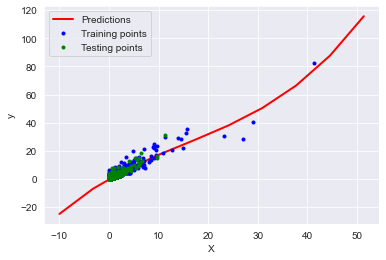

Intercept: 0.021
R2 score : 0.853
MSE: 0.258
RMSE: 0.508
MAE: 0.444
RSS: 863.153


In [28]:
# NA Sales degree 3
x = df1[['NA_Sales']]
y = df1['Global_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

x_max = np.max(x) + 10
x_min = np.min(x) - 10
#calculating line values of x and y
X_new = np.linspace(x_min, x_max,10)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


print("Intercept: %0.3f" % lr.intercept_)
print("R2 score : %.3f" % r2_score(y_test, lr.predict(poly.fit_transform(x_test))))
print("MSE: %.3f" % mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test)))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, lr.predict(poly.fit_transform(x_test)))))
rss = (mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))*len(y_test)
print("RSS: %0.3f" % rss)


In [29]:
xtrain_sm = sm.add_constant(x_train_trans)
lr = sm.OLS(y_train,xtrain_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 3.815e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:52   Log-Likelihood:                -10155.
No. Observations:               13375   AIC:                         2.032e+04
Df Residuals:                   13371   BIC:                         2.035e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0213      0.005      4.206      0.000       0.011       0.031
x1             2.0165      0.011    178.454      0.000       1.994       2.039
x2            -0.0382      0.001    -26.108      0.000      -0.041      -0.035
x3             0.0008   3.35e-05     24.829      0.000       0.001       0.001
==============================================================================
Omnibus:                    13712.190   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11957583.605
Skew:                           4.160   Prob(JB):                         0.00
Kurtosis:                     149.244   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


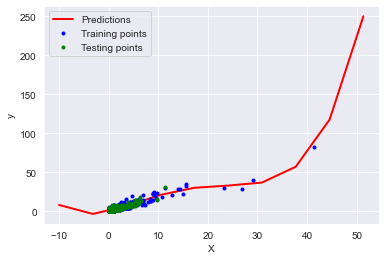

Intercept: 0.089
R2 score : 0.867
MSE: 0.234
RMSE: 0.483
MAE: 0.443
RSS: 781.171


In [30]:
# NA Sales degree 4
x = df1[['NA_Sales']]
y = df1['Global_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

x_max = np.max(x) + 10
x_min = np.min(x) - 10
#calculating line values of x and y
X_new = np.linspace(x_min, x_max,10)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


print("Intercept: %0.3f" % lr.intercept_)
print("R2 score : %.3f" % r2_score(y_test, lr.predict(poly.fit_transform(x_test))))
print("MSE: %.3f" % mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test)))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, lr.predict(poly.fit_transform(x_test)))))
rss = (mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))*len(y_test)
print("RSS: %0.3f" % rss)


In [31]:
xtrain_sm = sm.add_constant(x_train_trans)
lr = sm.OLS(y_train,xtrain_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 3.520e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:52   Log-Likelihood:                -8901.5
No. Observations:               13375   AIC:                         1.781e+04
Df Residuals:                   13370   BIC:                         1.785e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0885      0.005     18.508      0.000       0.079       0.098
x1             1.5381      0.014    111.924      0.000       1.511       1.565
x2             0.1263      0.003     37.087      0.000       0.120       0.133
x3            -0.0094      0.000    -47.629      0.000      -0.010      -0.009
x4             0.0002   3.03e-06     52.506      0.000       0.000       0.000
==============================================================================
Omnibus:                    13644.772   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4442991.666
Skew:                           4.438   Prob(JB):                         0.00
Kurtosis:                      91.846   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


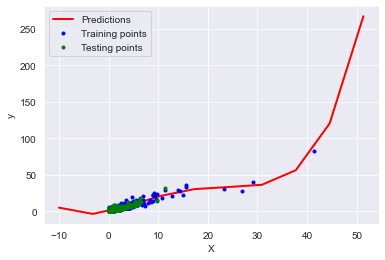

Intercept: 0.087
R2 score : 0.867
MSE: 0.233
RMSE: 0.483
MAE: 0.443
RSS: 780.388


In [32]:
# NA Sales degree 5
x = df1[['NA_Sales']]
y = df1['Global_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

poly = PolynomialFeatures(degree=5, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

x_max = np.max(x) + 10
x_min = np.min(x) - 10
#calculating line values of x and y
X_new = np.linspace(x_min, x_max,10)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


print("Intercept: %0.3f" % lr.intercept_)
print("R2 score : %.3f" % r2_score(y_test, lr.predict(poly.fit_transform(x_test))))
print("MSE: %.3f" % mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test)))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, lr.predict(poly.fit_transform(x_test)))))
rss = (mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))*len(y_test)
print("RSS: %0.3f" % rss)


In [33]:
xtrain_sm = sm.add_constant(x_train_trans)
lr = sm.OLS(y_train,xtrain_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 2.816e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:53   Log-Likelihood:                -8900.5
No. Observations:               13375   AIC:                         1.781e+04
Df Residuals:                   13369   BIC:                         1.786e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0865      0.005     17.387      0.000       0.077       0.096
x1             1.5564      0.018     84.169      0.000       1.520       1.593
x2             0.1156      0.008     14.506      0.000       0.100       0.131
x3            -0.0080      0.001     -8.740      0.000      -0.010      -0.006
x4             0.0001   3.62e-05      2.919      0.004    3.47e-05       0.000
x5          6.575e-07   4.45e-07      1.477      0.140   -2.15e-07    1.53e-06
==============================================================================
Omnibus:                    13718.960   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4486005.466
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      92.271   Cond. No.                     5.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


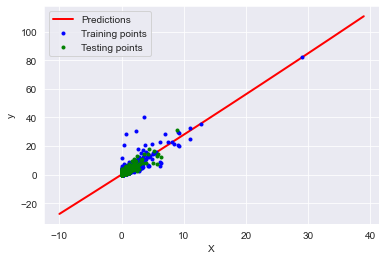

Intercept: 0.136
R2 score : 0.839
MSE: 0.284
RMSE: 0.533
MAE: 0.491
RSS: 949.083


In [34]:
# EU Sales degree 2
x = df1[['EU_Sales']]
y = df1['Global_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

x_max = np.max(x) + 10
x_min = np.min(x) - 10
#calculating line values of x and y
X_new = np.linspace(x_min, x_max,10)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


print("Intercept: %0.3f" % lr.intercept_)
print("R2 score : %.3f" % r2_score(y_test, lr.predict(poly.fit_transform(x_test))))
print("MSE: %.3f" % mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test)))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, lr.predict(poly.fit_transform(x_test)))))
rss = (mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))*len(y_test)
print("RSS: %0.3f" % rss)


In [35]:
xtrain_sm = sm.add_constant(x_train_trans)
lr = sm.OLS(y_train,xtrain_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                 2.809e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:53   Log-Likelihood:                -14225.
No. Observations:               13375   AIC:                         2.846e+04
Df Residuals:                   13372   BIC:                         2.848e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1358      0.006     21.062      0.000       0.123       0.148
x1             2.7663      0.017    164.100      0.000       2.733       2.799
x2             0.0019      0.001      1.669      0.095      -0.000       0.004
==============================================================================
Omnibus:                    26638.488   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        192141337.706
Skew:                          15.735   Prob(JB):                         0.00
Kurtosis:                     589.333   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


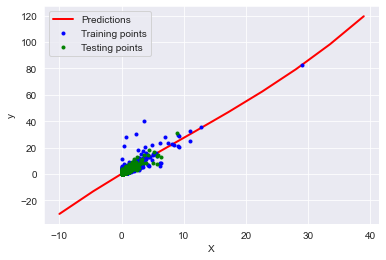

Intercept: 0.130
R2 score : 0.838
MSE: 0.285
RMSE: 0.534
MAE: 0.491
RSS: 952.541


In [36]:
# EU Sales degree 3
x = df1[['EU_Sales']]
y = df1['Global_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

x_max = np.max(x) + 10
x_min = np.min(x) - 10
#calculating line values of x and y
X_new = np.linspace(x_min, x_max,10)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


print("Intercept: %0.3f" % lr.intercept_)
print("R2 score : %.3f" % r2_score(y_test, lr.predict(poly.fit_transform(x_test))))
print("MSE: %.3f" % mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test)))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, lr.predict(poly.fit_transform(x_test)))))
rss = (mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))*len(y_test)
print("RSS: %0.3f" % rss)


In [37]:
xtrain_sm = sm.add_constant(x_train_trans)
lr = sm.OLS(y_train,xtrain_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                 1.875e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:53   Log-Likelihood:                -14219.
No. Observations:               13375   AIC:                         2.845e+04
Df Residuals:                   13371   BIC:                         2.848e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1300      0.007     19.469      0.000       0.117       0.143
x1             2.8309      0.026    110.194      0.000       2.781       2.881
x2            -0.0161      0.005     -2.928      0.003      -0.027      -0.005
x3             0.0006      0.000      3.334      0.001       0.000       0.001
==============================================================================
Omnibus:                    26648.029   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        190733425.379
Skew:                          15.752   Prob(JB):                         0.00
Kurtosis:                     587.173   Cond. No.                         919.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


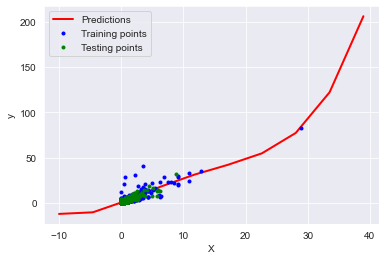

Intercept: 0.137
R2 score : 0.836
MSE: 0.288
RMSE: 0.536
MAE: 0.491
RSS: 961.815


In [38]:
# EU Sales degree 4
x = df1[['EU_Sales']]
y = df1['Global_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

poly = PolynomialFeatures(degree=4, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

x_max = np.max(x) + 10
x_min = np.min(x) - 10
#calculating line values of x and y
X_new = np.linspace(x_min, x_max,10)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


print("Intercept: %0.3f" % lr.intercept_)
print("R2 score : %.3f" % r2_score(y_test, lr.predict(poly.fit_transform(x_test))))
print("MSE: %.3f" % mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test)))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, lr.predict(poly.fit_transform(x_test)))))
rss = (mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))*len(y_test)
print("RSS: %0.3f" % rss)


In [39]:
xtrain_sm = sm.add_constant(x_train_trans)
lr = sm.OLS(y_train,xtrain_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                 1.408e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:53   Log-Likelihood:                -14211.
No. Observations:               13375   AIC:                         2.843e+04
Df Residuals:                   13370   BIC:                         2.847e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1371      0.007     19.850      0.000       0.124       0.151
x1             2.7214      0.038     72.432      0.000       2.648       2.795
x2             0.0539      0.018      2.934      0.003       0.018       0.090
x3            -0.0075      0.002     -3.699      0.000      -0.012      -0.004
x4             0.0002   5.05e-05      3.991      0.000       0.000       0.000
==============================================================================
Omnibus:                    26495.984   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        188577590.407
Skew:                          15.539   Prob(JB):                         0.00
Kurtosis:                     583.876   Cond. No.                     4.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


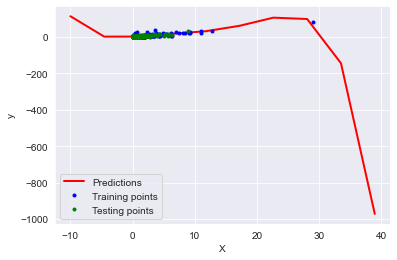

Intercept: 0.148
R2 score : 0.834
MSE: 0.291
RMSE: 0.539
MAE: 0.492
RSS: 973.162


In [40]:
# EU Sales degree 5
x = df1[['EU_Sales']]
y = df1['Global_Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

poly = PolynomialFeatures(degree=5, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

x_max = np.max(x) + 10
x_min = np.min(x) - 10
#calculating line values of x and y
X_new = np.linspace(x_min, x_max,10)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


print("Intercept: %0.3f" % lr.intercept_)
print("R2 score : %.3f" % r2_score(y_test, lr.predict(poly.fit_transform(x_test))))
print("MSE: %.3f" % mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test)))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, lr.predict(poly.fit_transform(x_test)))))
rss = (mean_squared_error(y_test, lr.predict(poly.fit_transform(x_test))))*len(y_test)
print("RSS: %0.3f" % rss)


In [41]:
xtrain_sm = sm.add_constant(x_train_trans)
lr = sm.OLS(y_train,xtrain_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:54   Log-Likelihood:                -14192.
No. Observations:               13375   AIC:                         2.840e+04
Df Residuals:                   13369   BIC:                         2.844e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1478      0.007     20.781      0.000       0.134       0.162
x1             2.5113      0.051     49.558      0.000       2.412       2.611
x2             0.2738      0.040      6.831      0.000       0.195       0.352
x3            -0.0603      0.009     -6.862      0.000      -0.078      -0.043
x4             0.0043      0.001      6.457      0.000       0.003       0.006
x5         -8.665e-05    1.4e-05     -6.171      0.000      -0.000   -5.91e-05
==============================================================================
Omnibus:                    26398.285   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        183609106.014
Skew:                          15.412   Prob(JB):                         0.00
Kurtosis:                     576.164   Cond. No.                     1.85e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Ridge Regression

In [43]:
# NA_Sales
X = df1[['NA_Sales']]
Y = df1['Global_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.50,random_state=1)
ridgeReg=Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
pred=ridgeReg.predict(X_test)
mse=np.mean((pred-y_test)**2)
mse


C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.2398814557933692

In [44]:
print(ridgeReg.coef_)
print("Intercept: %0.3f" % ridgeReg.intercept_)
print("R2 score : %.3f" % r2_score(y_test,ridgeReg.predict(X_test)))
print("MSE: %.3f" % mean_squared_error(y_test, ridgeReg.predict(X_test)))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, ridgeReg.predict(X_test))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, ridgeReg.predict(X_test))))

[1.70422867]
Intercept: 0.086
R2 score : 0.867
MSE: 0.240
RMSE: 0.490
MAE: 0.448


In [45]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const       0.063296
NA_Sales    1.789440
dtype: float64

In [46]:
print(lr.ssr)

2612.8763961885143


In [47]:
#cp

m=len(Y)
p=1
hat_sigma_squared=(1/(m-p-1))*(lr.ssr)
Cp=(1/m)*((lr.ssr)+2*p* hat_sigma_squared)
Cp

0.1563005560919133

In [48]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 7.161e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:54   Log-Likelihood:                -7000.6
No. Observations:                8359   AIC:                         1.401e+04
Df Residuals:                    8357   BIC:                         1.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0633      0.006      9.936      0.000       0.051       0.076
NA_Sales       1.7894      0.007    267.593      0.000       1.776       1.803
==============================================================================
Omnibus:                     5077.333   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29294641.215
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                     293.008   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# EU_Sales
X = df1[['EU_Sales']]
Y = df1['Global_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.50,random_state=1)
ridgeReg=Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
pred=ridgeReg.predict(X_test)
mse=np.mean((pred-y_test)**2)
mse

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.4091031474324704

In [50]:
print(ridgeReg.coef_)
print("Intercept: %0.3f" % ridgeReg.intercept_)
print("R2 score : %.3f" % r2_score(y_test,ridgeReg.predict(X_test)))
print("MSE: %.3f" % mean_squared_error(y_test, ridgeReg.predict(X_test)))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, ridgeReg.predict(X_test))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, ridgeReg.predict(X_test))))

[2.64285984]
Intercept: 0.150
R2 score : 0.773
MSE: 0.409
RMSE: 0.640
MAE: 0.499


In [51]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const       0.130791
EU_Sales    2.775003
dtype: float64

In [52]:
print(lr.ssr)

4124.741072573696


In [53]:
#cp

m=len(Y)
p=1
hat_sigma_squared=(1/(m-p-1))*(lr.ssr)
Cp=(1/m)*((lr.ssr)+2*p* hat_sigma_squared)
Cp

0.24673931163328922

In [54]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 4.230e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:54   Log-Likelihood:                -8908.8
No. Observations:                8359   AIC:                         1.782e+04
Df Residuals:                    8357   BIC:                         1.784e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1308      0.008     16.477      0.000       0.115       0.146
EU_Sales       2.7750      0.013    205.661      0.000       2.749       2.801
==============================================================================
Omnibus:                    17383.399   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        160414181.090
Skew:                          17.272   Prob(JB):                         0.00
Kurtosis:                     680.777   Cond. No.                         1.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# NA_Sales and EU_Sales
X = df1[['NA_Sales','EU_Sales']]
Y = df1['Global_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.50,random_state=1)
ridgeReg=Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
pred=ridgeReg.predict(X_test)
mse=np.mean((pred-y_test)**2)
mse

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.09347624746026827

In [56]:
print(ridgeReg.coef_)
print("Intercept: %0.3f" % ridgeReg.intercept_)
print("R2 score : %.3f" % r2_score(y_test,ridgeReg.predict(X_test)))
print("MSE: %.3f" % mean_squared_error(y_test, ridgeReg.predict(X_test)))
print("RMSE: %.3f" % math.sqrt(mean_squared_error(y_test, ridgeReg.predict(X_test))))
print("MAE: %.3f" % math.sqrt(mean_absolute_error(y_test, ridgeReg.predict(X_test))))

[1.07464149 1.35679388]
Intercept: 0.054
R2 score : 0.948
MSE: 0.093
RMSE: 0.306
MAE: 0.343


In [57]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const       0.039295
NA_Sales    1.127970
EU_Sales    1.357622
dtype: float64

In [58]:
print(lr.ssr)

675.3495510534972


In [59]:
#cp

m=len(Y)
p=2
hat_sigma_squared=(1/(m-p-1))*981.6832126709797
Cp=(1/m)*((lr.ssr)+2*2* hat_sigma_squared)
Cp

0.04040818587804052

In [60]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.505e+05
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:54   Log-Likelihood:                -1345.9
No. Observations:                8359   AIC:                             2698.
Df Residuals:                    8356   BIC:                             2719.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0393      0.003     12.119      0.000       0.033       0.046
NA_Sales       1.1280      0.005    206.589      0.000       1.117       1.139
EU_Sales       1.3576      0.009    154.831      0.000       1.340       1.375
==============================================================================
Omnibus:                    12092.408   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8261021.731
Skew:                           8.402   Prob(JB):                         0.00
Kurtosis:                     156.089   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Lasso Regression

In [62]:
# NA_Sales
X = df1[['NA_Sales']]
Y = df1['Global_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.50,random_state=1)
lassoReg=Lasso(alpha=0.05, normalize=True)
lassoReg.fit(X_train,y_train)
laspred=lassoReg.predict(X_test)
las_mse=np.mean((laspred-y_test)**2)
las_mse

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


1.801177513563923

In [63]:
from math import sqrt
print(lassoReg.coef_)
print("Intercept: %0.3f" % lassoReg.intercept_)
print("R2 score : %.3f" % r2_score(y_test,lassoReg.predict(X_test)))
print("MSE: %.3f" % mean_squared_error(y_test, lassoReg.predict(X_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, lassoReg.predict(X_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, lassoReg.predict(X_test))))

[0.]
Intercept: 0.540
R2 score : -0.000
MSE: 1.801
RMSE: 1.342
MAE: 0.765


In [64]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const       0.063296
NA_Sales    1.789440
dtype: float64

In [65]:
print(lr.ssr)

2612.8763961885143


In [66]:
#cp

m=len(Y)
p=1
hat_sigma_squared=(1/(m-p-1))*3461.3365566687708
Cp=(1/m)*(3461.3365566687708+2*1* hat_sigma_squared)
Cp

0.2070548876394551

In [67]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 7.161e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:54   Log-Likelihood:                -7000.6
No. Observations:                8359   AIC:                         1.401e+04
Df Residuals:                    8357   BIC:                         1.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0633      0.006      9.936      0.000       0.051       0.076
NA_Sales       1.7894      0.007    267.593      0.000       1.776       1.803
==============================================================================
Omnibus:                     5077.333   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29294641.215
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                     293.008   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# EU_Sales
X = df1[['EU_Sales']]
Y = df1['Global_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.50,random_state=1)
lassoReg=Lasso(alpha=0.05, normalize=True)
lassoReg.fit(X_train,y_train)
laspred=lassoReg.predict(X_test)
las_mse=np.mean((laspred-y_test)**2)
las_mse

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


1.801177513563923

In [69]:
from math import sqrt
print(lassoReg.coef_)
print("Intercept: %0.3f" % lassoReg.intercept_)
print("R2 score : %.3f" % r2_score(y_test,lassoReg.predict(X_test)))
print("MSE: %.3f" % mean_squared_error(y_test, lassoReg.predict(X_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, lassoReg.predict(X_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, lassoReg.predict(X_test))))

[0.]
Intercept: 0.540
R2 score : -0.000
MSE: 1.801
RMSE: 1.342
MAE: 0.765


In [70]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const       0.130791
EU_Sales    2.775003
dtype: float64

In [71]:
print(lr.ssr)

4124.741072573696


In [72]:
#cp

m=len(Y)
p=1
hat_sigma_squared=(1/(m-p-1))*(lr.ssr)
Cp=(1/m)*((lr.ssr)+2*1* hat_sigma_squared)
Cp

0.24673931163328922

In [73]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 4.230e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:54   Log-Likelihood:                -8908.8
No. Observations:                8359   AIC:                         1.782e+04
Df Residuals:                    8357   BIC:                         1.784e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1308      0.008     16.477      0.000       0.115       0.146
EU_Sales       2.7750      0.013    205.661      0.000       2.749       2.801
==============================================================================
Omnibus:                    17383.399   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        160414181.090
Skew:                          17.272   Prob(JB):                         0.00
Kurtosis:                     680.777   Cond. No.                         1.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# NA_Sales and EU_Sales
X = df1[['NA_Sales','EU_Sales']]
Y = df1['Global_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.50,random_state=1)
lassoReg=Lasso(alpha=0.05, normalize=True)
lassoReg.fit(X_train,y_train)
laspred=lassoReg.predict(X_test)
las_mse=np.mean((laspred-y_test)**2)
las_mse

C:\anaconda3\envs\Data Science\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


1.801177513563923

In [75]:
from math import sqrt
print(lassoReg.coef_)
print("Intercept: %0.3f" % lassoReg.intercept_)
print("R2 score : %.3f" % r2_score(y_test,lassoReg.predict(X_test)))
print("MSE: %.3f" % mean_squared_error(y_test, lassoReg.predict(X_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, lassoReg.predict(X_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, lassoReg.predict(X_test))))

[0. 0.]
Intercept: 0.540
R2 score : -0.000
MSE: 1.801
RMSE: 1.342
MAE: 0.765


In [76]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params

const       0.039295
NA_Sales    1.127970
EU_Sales    1.357622
dtype: float64

In [77]:
print(lr.ssr)

675.3495510534972


In [78]:
#cp

m=len(Y)
p=2
hat_sigma_squared=(1/(m-p-1))*(lr.ssr)
Cp=(1/m)*((lr.ssr)+2*2* hat_sigma_squared)
Cp

0.040403801459019804

In [79]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.505e+05
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:54:54   Log-Likelihood:                -1345.9
No. Observations:                8359   AIC:                             2698.
Df Residuals:                    8356   BIC:                             2719.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0393      0.003     12.119      0.000       0.033       0.046
NA_Sales       1.1280      0.005    206.589      0.000       1.117       1.139
EU_Sales       1.3576      0.009    154.831      0.000       1.340       1.375
==============================================================================
Omnibus:                    12092.408   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8261021.731
Skew:                           8.402   Prob(JB):                         0.00
Kurtosis:                     156.089   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Gradient Descent

In [81]:
# NA_Sales
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.00002

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [82]:
x_sr = df.iloc[: , 5:6].values
y = df.iloc[:, 9:10].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x_train)

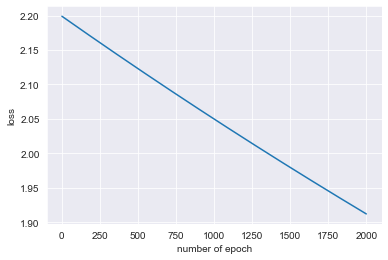

In [83]:
w,b=gradient_descent(X_transform,y_train)

In [84]:
print("weight:",w)
print("bias:",b)

weight: [0.30821176]
bias: [0.04095376]


In [85]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [86]:
X_test=sc.fit_transform(x_test)
y_pred=predict(X_test)

In [87]:
from math import sqrt
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

R2 score : 0.230
MSE: 1.531
RMSE: 1.237
MAE: 0.704


In [88]:
# EU_Sales
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.00002

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [89]:
x_sr = df.iloc[: , 6:7].values
y = df.iloc[:, 9:10].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x_train)

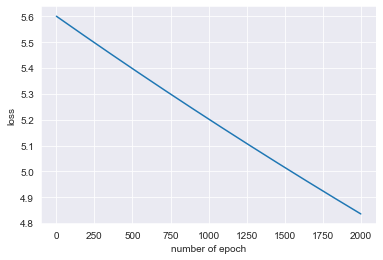

In [90]:
w,b=gradient_descent(X_transform,y_train)

In [91]:
print("weight:",w)
print("bias:",b)

weight: [-0.60130942]
bias: [0.04095376]


In [92]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

X_test=sc.fit_transform(x_test)
y_pred=predict(X_test)

In [93]:
from math import sqrt
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

R2 score : -1.026
MSE: 4.027
RMSE: 2.007
MAE: 0.806


In [94]:
# NA_Sales and EU_Sales
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.00002

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

In [95]:
x_sr = df.iloc[: , 5:7].values
y = df.iloc[:, 9:10].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sr, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x_train)

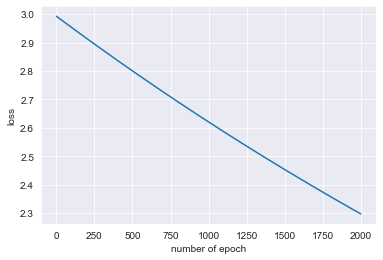

In [96]:
w,b=gradient_descent(X_transform,y_train)

In [97]:
print("weight:",w)
print("bias:",b)

weight: [0.113732   0.04341527]
bias: [0.04095376]


In [98]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

X_test=sc.fit_transform(x_test)
y_pred=predict(X_test)

In [99]:
from math import sqrt
print("R2 score : %.3f" % r2_score(y_test, y_pred))
print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, y_pred)))

R2 score : 0.066
MSE: 1.858
RMSE: 1.363
MAE: 0.704
